<img src="../logo_UTN.svg" align="right" width="150" /> 

#### Teoría de los Circuitos 2

# Evidencias clase 18 - 14/9
#### Lugano Damian

-----------------

Esta semana volvieron las evidencias. No había estado haciendo porque la verdad que lo que trabajé entre semanas fue específicamente para las tareas semanales y no era necesario agregar mucho más que lo que se escribió en esos jupyters.

Sin embargo esta semana estuve trabajando un poco fuera de clase para muestrear una señal y luego filtrarla con los filtros digitales de clase. Si bien todavía no me tomé el trabajo de filtrarla, si muestreé diferentes señales:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pydub import AudioSegment

In [2]:
# Cargar el archivo MP3
#audio_file = AudioSegment.from_mp3('/home/dlugano/UTN/4to/TC2/TC2_2023_Lugano/Simulaciones_Practica/SamplePrueba/Violin.mp3')
audio_file = AudioSegment.from_mp3('/home/dlugano/UTN/4to/TC2/TC2_2023_Lugano/Simulaciones_Practica/SamplePrueba/Woman.mp3')
#audio_file = AudioSegment.from_mp3('/home/dlugano/UTN/4to/TC2/TC2_2023_Lugano/Simulaciones_Practica/SamplePrueba/Explosion.mp3')

In [3]:
# Obtener el vector de muestras y la frecuencia de muestreo
sample_rate = audio_file.frame_rate
samples = np.array(audio_file.get_array_of_samples())

print(sample_rate)
print(len(samples))

44100
286720


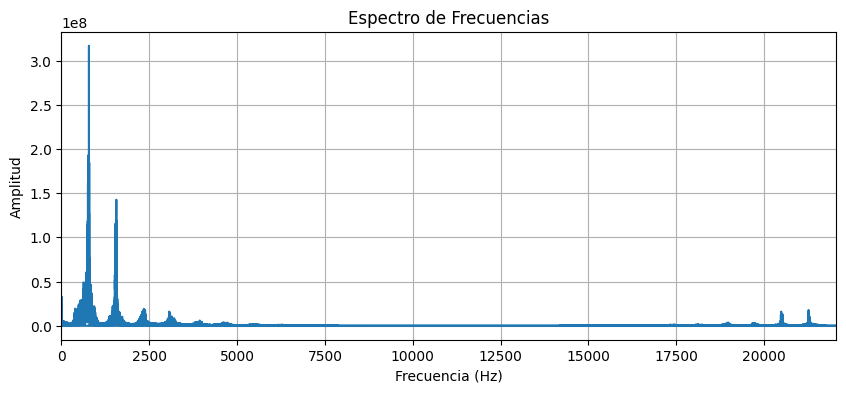

In [4]:
# Calcular la transformada de Fourier
fft_result = np.fft.fft(samples)
freqs = np.fft.fftfreq(len(samples), 1 / sample_rate)

# Calcular el espectro de amplitud (magnitud)
magnitude = np.abs(fft_result)

# Plotear el espectro de frecuencias
plt.figure(figsize=(10, 4))
plt.plot(freqs, magnitude)
plt.title('Espectro de Frecuencias')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.xlim(0, (sample_rate / 2))  # Mostrar solo frecuencias positivas
plt.grid()
plt.show()

Por otro lado, si bien no suelo hablar mucho de lo que investigo para las tareas semanales, esta vez me pareció copado mostrar la documentación de las funciones que estuve leyendo para desarrollar los programas

Esta primer función es la que utilizé para el diseño de los filtros IIR

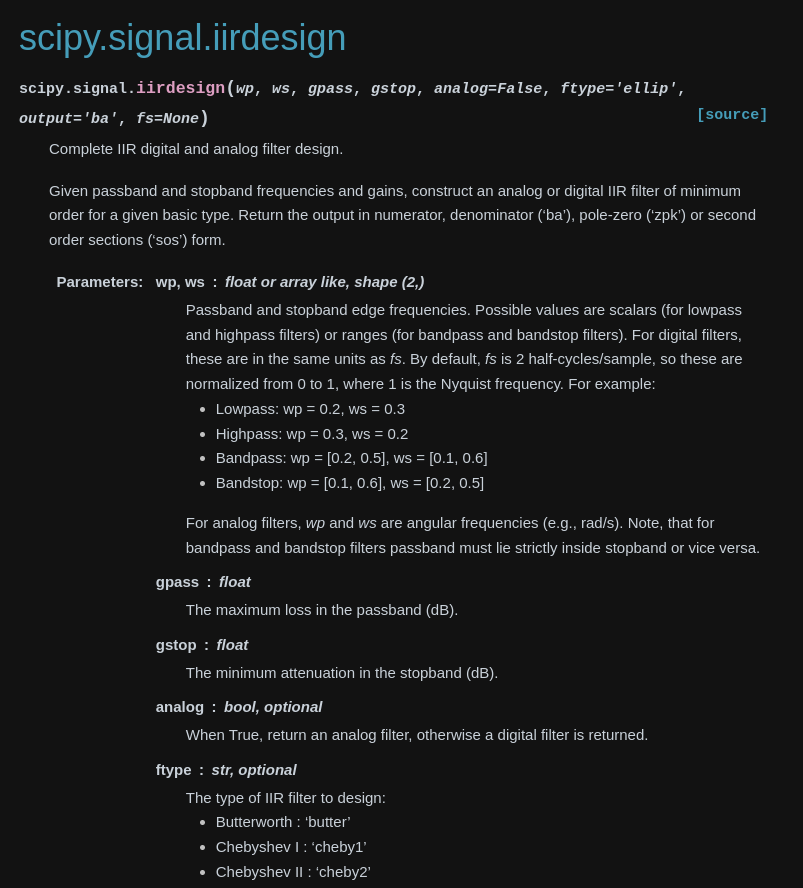

Esta función la utilizé para diseñar filtros FIR

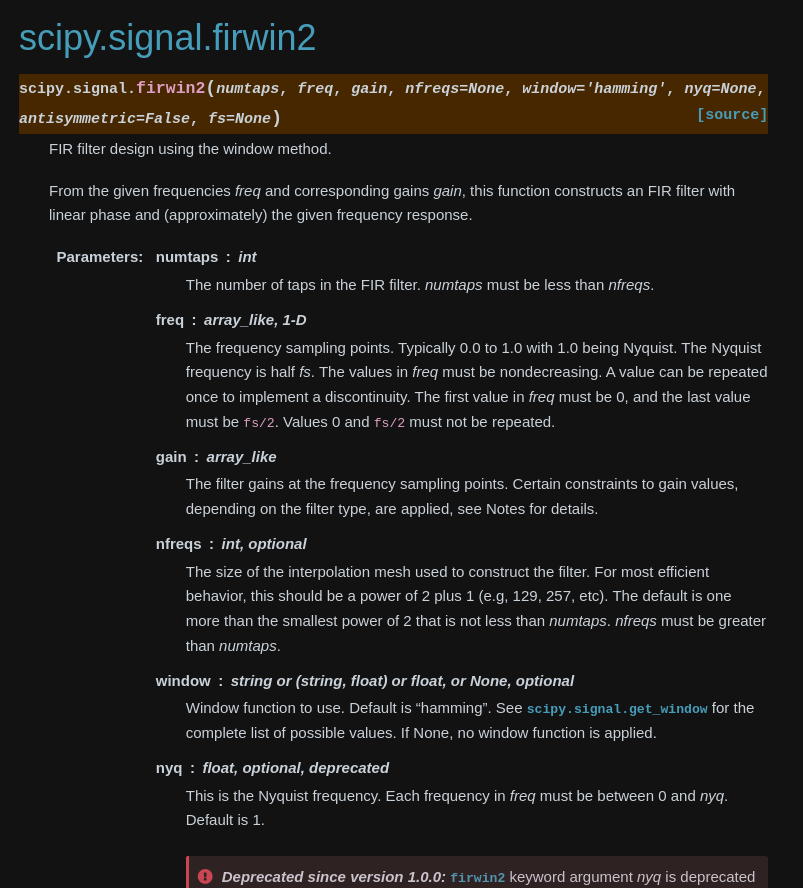

Busqué una función de group delay que no sea las de pytc2 simplemente para probar algo nuevo

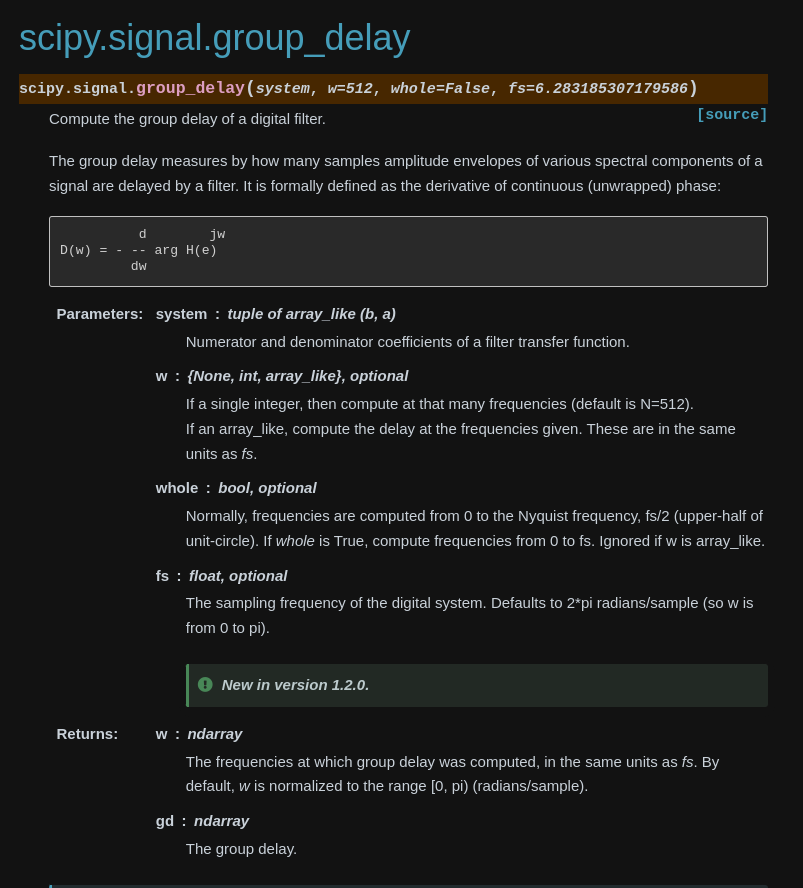

Cuando tuve que calcular la respuesta al impulso de los filtros probé con esta función sig.impulse(). Sin embargo no fue de utilidad, lo más facil era directamente convolucionar un delta con la transferencia del filtro.

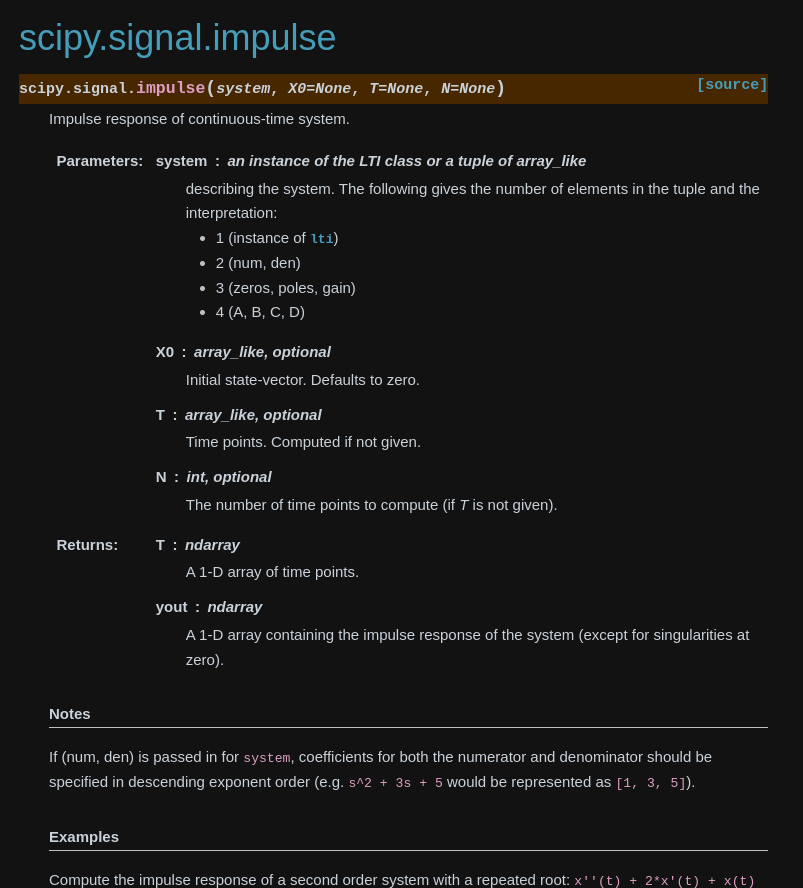

Por lo tanto, terminé utilizando esta funcion sig.unit_impulse que genera el delta

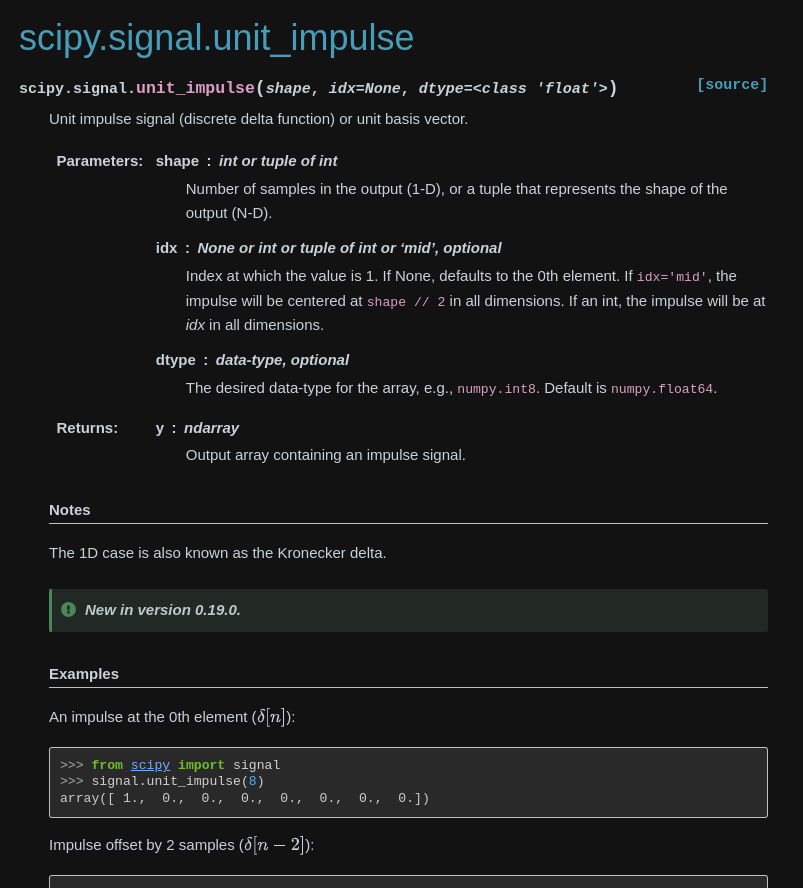

Luego, equivocadamente intenté utilizar la función ltfilter para convolucionar el delta con la transferencia del filtro. Sin embargo, no me di cuenta que esta funcion estaba hecha para trabajar directamente con filtros de bajo orden. Por lo tanto, no me funcionó bien.

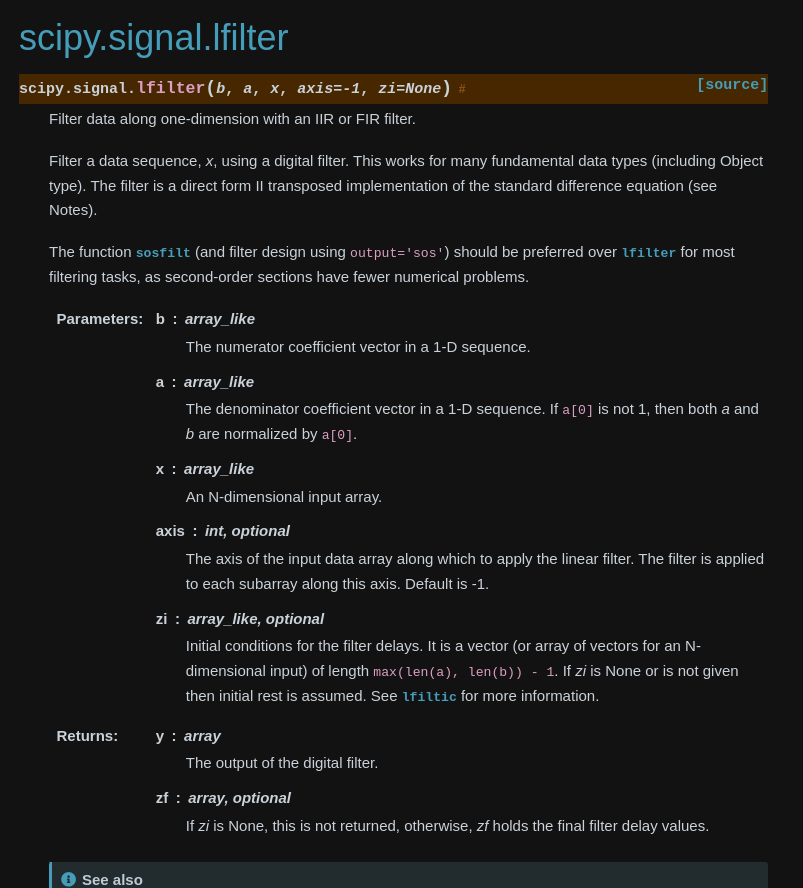

Terminé utilizando esta función que está hecha para directamente poner el tipo de dato sos

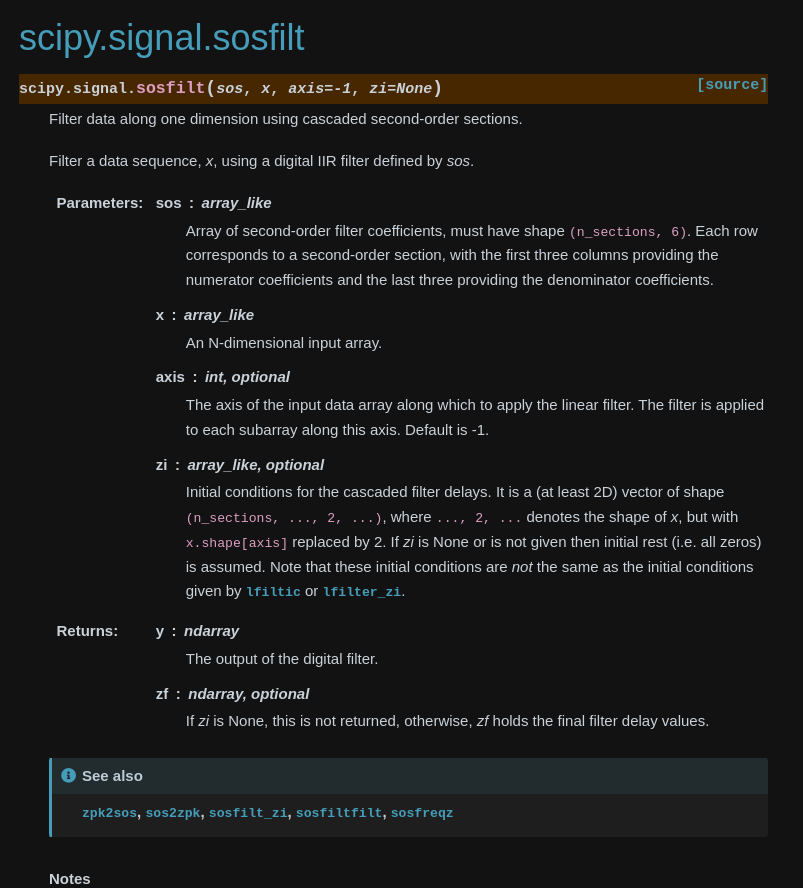

Por último, a la hora de investigar como hacer un delta de dirac, hice lo propio buscando en google y si bien la libreria de scipy.signal ofrece una alternativa, encontré una función en stackoverflow que me pareció muy util.

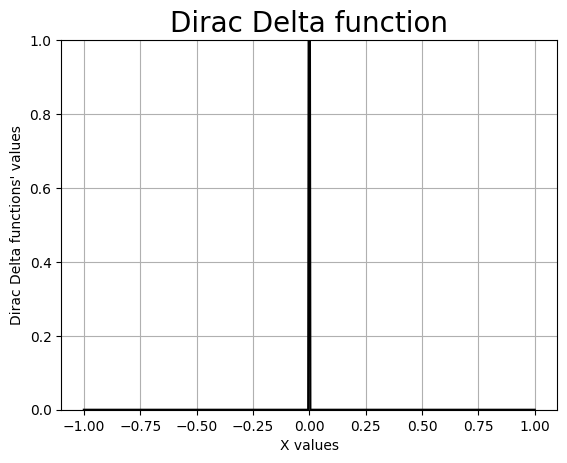

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def ddf(x,sig):
    val = np.zeros_like(x)
    val[(-(1/(2*sig))<=x) & (x<=(1/(2*sig)))] = 1
    return val

X=np.linspace(-1,1,1000)

plt.plot(X,ddf(X,100),color='black')
plt.grid()
plt.title('Dirac Delta function',size=20)
plt.xlabel('X values',size=10)
plt.ylabel("Dirac Delta functions' values",size=10)
plt.ylim(0,1)
plt.show()

En total, terminar la tarea semanal 8, sin contar lo que hicimos en clase, me llevó algo de **5 horas** con todos los detalles.